# 회귀분석 예제 - 보스턴 집값 예측


sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. </br>
그 중 `load_boston()` 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터이다. </br>

보스턴의 506개 타운(town)의 13개 독립변수 값들로부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. </br>
사용할 수 있는 특징 데이터는 다음과 같다.

* 독립변수

	* `CRIM`: 범죄율

	* `INDUS`: 비소매상업지역 면적 비율
	* `NOX`: 일산화질소 농도 
	* `RM`: 주택당 방 수
	* `LSTAT`: 인구 중 하위 계층 비율
	* `B`: 인구 중 흑인 비율
	* `PTRATIO`: 학생/교사 비율
	* `ZN`: 25,000 평방피트를 초과 거주지역 비율
	* `CHAS`: 찰스강의 경계에 위치한 경우는 1, 아니면 0
	* `AGE`: 1940년 이전에 건축된 주택의 비율
	* `RAD`: 방사형 고속도로까지의 거리
	* `DIS`: 직업센터의 거리
	* `TAX`: 재산세율<br></br>

* 종속변수

	 * `PRICE` : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

</br>

`load_boston` --> 더 이상 제공하지 않음.

> from sklearn.datasets import load_boston</br>
> --> `ImportError`: load_boston has been removed from scikit-learn since version 1.2.<br></br>
>
> data_url = "http://lib.stat.cmu.edu/datasets/boston"</br>
> boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)</br>
> data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])</br>
> target = boston.values[1::2, 2]


#### --▶ Boston DataSet

In [5]:
import pandas as pd

url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/boston.csv'
boston = pd.read_csv(url)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.rename(columns={'MEDV': 'PRICE'}, inplace=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### --▶ PRICE Histogram

- PRICE(집값)에 대한 히스토그램

In [9]:
import plotly.express as px

fig = px.histogram(boston, x='PRICE')
fig.show()

<img src="./image/boston_price.png">

#### --▶ Correlation Hitmap

- 각 특성(Features)별 상관계수를 확인한다.

In [17]:
corr_matrix = boston.corr().round(1)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


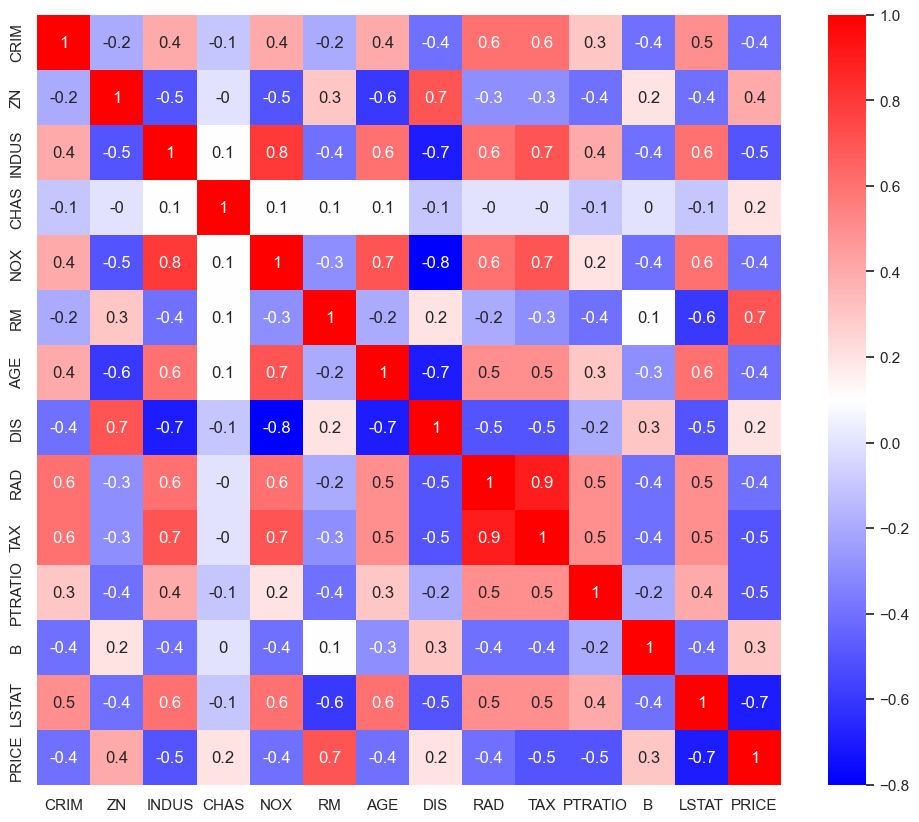

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(rc={'figure.figsize': (12,10)})
#--> rc :<dict or None> Dictionary of rc parameter mappings to override the above other param.

sns.heatmap(data=corr_matrix, annot=True, cmap='bwr');

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


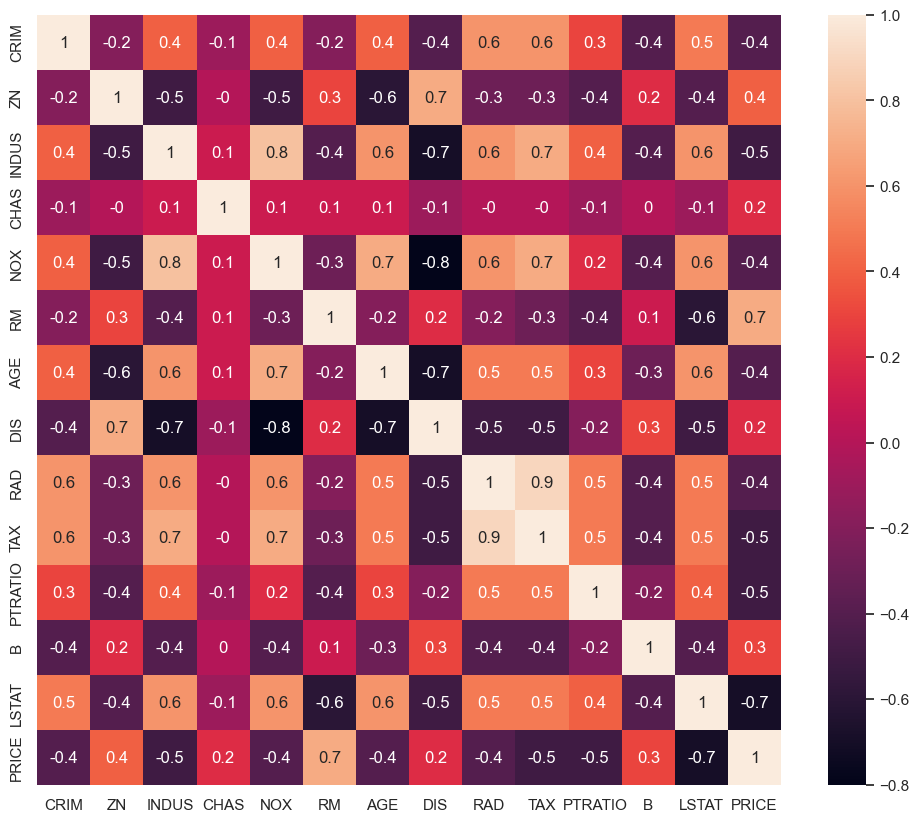

In [16]:
corr_matrix = boston.corr(method='pearson').round(1)
display(corr_matrix)

sns.set_theme(rc={'figure.figsize': (12,10)})
sns.heatmap(data=corr_matrix, annot=True);

👉 PRICE - RM, LSTAT

- PRICE와 상관관계가 높은 RM(방의수: 0.7)와 LSTAT(저소득층 인구: -0.7) 사이의 관계에 대해 좀 더 관찰해본다.

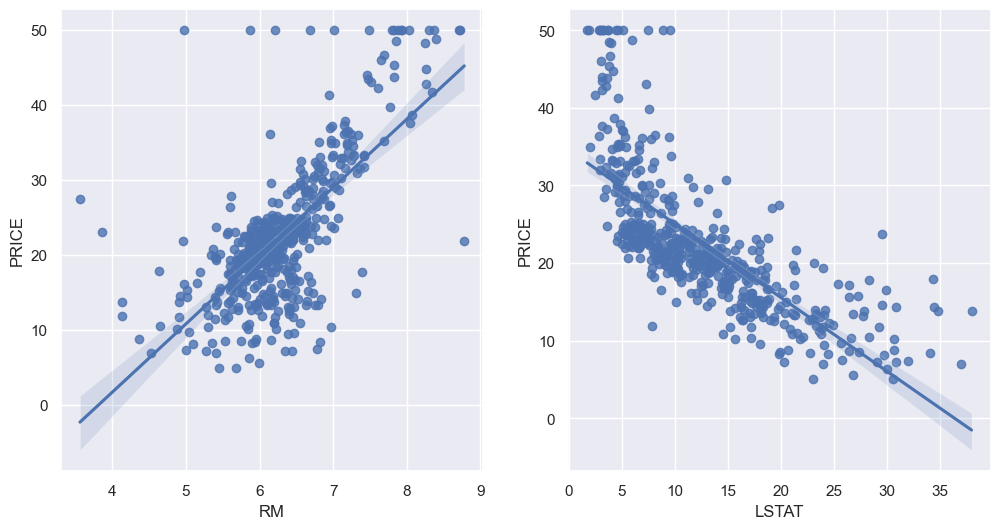

In [14]:
sns.set_style('darkgrid')
sns.set_theme(rc={'figure.figsize': (12,6)})

fig, ax = plt.subplots(ncols=2) # 컬럼 수
sns.regplot(x='RM', y='PRICE', data=boston, ax=ax[0]);
sns.regplot(x='LSTAT', y='PRICE', data=boston, ax=ax[1]);

👉 문제 제기

- 방의 개수가 많을 수록, 저소득층 인구가 낮을 수록 집 값이 높아질까???

- 분석 모델을 만들어 본다.

</br>

## 🔰 Linear Regression Model

#### --▶ Split Data

In [20]:
from sklearn.model_selection import train_test_split

X = boston.drop(columns='PRICE')
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### --▶ LinearRegression

- 내부적으로 OLS(Ordinary Linear Least Square, 선형 최소 제곱)를 쓰고 있다.

In [26]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [27]:
lreg.score(X_test, y_test) #--> Accuracy ?? 결정계수, R-squared ??

0.7317666881184411

#### --▶ 모델 평가 : RMSE

- Root Mean Squared Error, 평균 제곱근 오차

- RMSE는 예측값과 실제값 간의 차이를 나타내는 지표로 주로 사용되며, 회귀 분석 및 기계 학습 모델의 성능을 평가하는 데에 자주 활용된다.

- RMSE가 작을수록 모델의 예측이 실제 값과 가깝다고 해석할 수 있다. 그러므로 RMSE가 작을수록 모델의 성능이 좋다고 볼 수 있다.

- RMSE는 다음과 같이 계산됩니다:

	$~~~~~~~ RMSE = \displaystyle \sqrt{\cfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$

	1. 각각의 데이터 포인트에서 예측값과 실제값의 차이를 제곱합니다.
	2. 모든 제곱 오차를 더하고 데이터 포인트 수로 나눕니다.
	3. 최종 값의 제곱근을 구합니다.

	여기서,
	- $n\,$은 데이터 포인트의 수
	- $y_i\,$는 실제 값
	- $\hat{y_i}\,$는 예측 값

- RMSE는 오차의 제곱을 취하여 음수 값이 양수 값과 같이 계산되고, 이후 제곱근을 취함으로써 오차의 단위를 실제 값과 동일한 단위로 되돌립니다. </br>
	이러한 특성 때문에 RMSE는 원래 단위로 해석하기 쉽습니다.


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE train :", rmse_tr)
print("RMSE test :", rmse_test)

RMSE train : 4.642806069019824
RMSE test : 4.931352584146716


#### --▶ 성능 확인 : scatter

- 상관관계가 높을수록 대각선에 값이 몰린다.

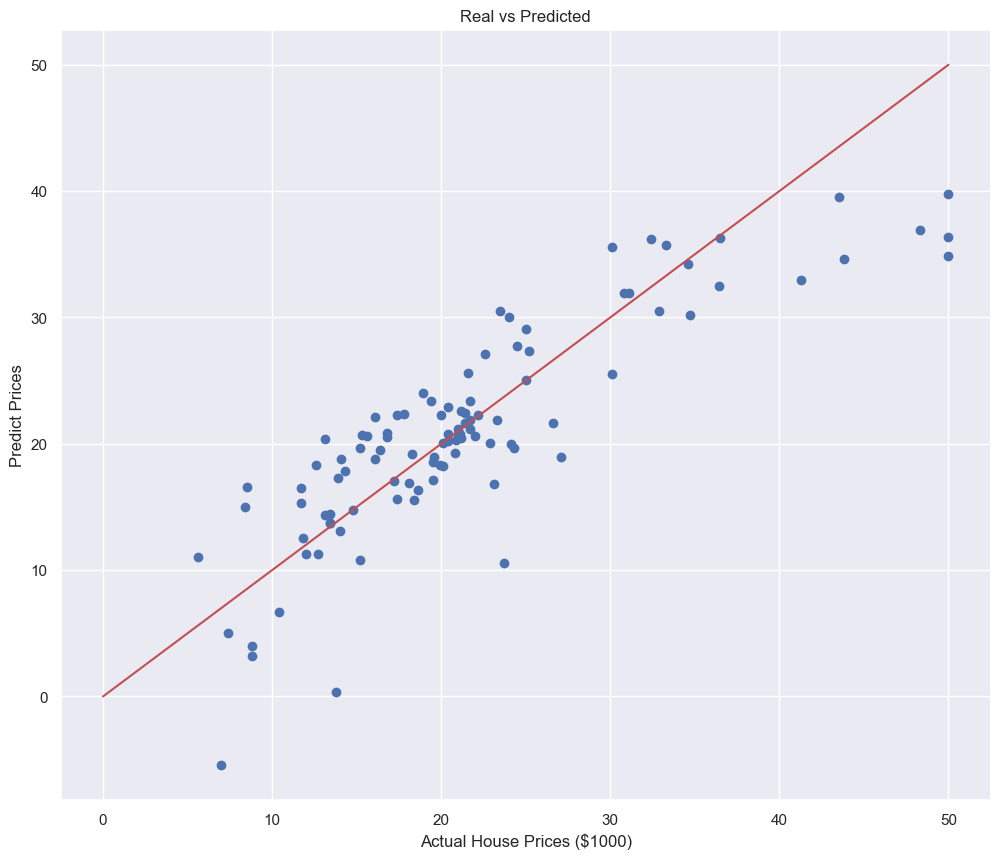

In [33]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predict Prices")
plt.title("Real vs Predicted")
plt.plot([0,50], [0,50], 'r')
plt.show()

👉 이상치 확인

- 집값이 높을수록 예측값이 참값과 차이를 보이고 있다. 실제값에 비해 낮은 가격으로 예측되고 있다.

- 상관관계가 음수로 높았던 특성 LSTAT(저소득층 인구)가 모델의 성능에 도움이 되는지 확인하기 위해</br>
	해당 특성을 제거하고 다시 모델링을 해서 평가 수치들을 비교해 본다.

In [ ]:
q1 = boston['PRICE'].quantile(0.25)
q2 = boston['PRICE'].quantile(0.5)
q3 = boston['PRICE'].quantile(0.75)
iqr = q3 - q1
q1, q2, q3, iqr

(17.025, 21.2, 25.0, 7.975000000000001)

In [ ]:
ceiling = q3 + iqr*3
ceiling

48.925000000000004

In [ ]:
max(boston["PRICE"])

50.0

#### --▶ Feature Engineering

- 기계 학습 모델의 성능을 향상시키기 위해 원시 데이터로부터 유용한 특성(또는 변수)을 생성하거나 선택하는 과정

- 머신 러닝 모델에 사용되는 데이터의 특성(Feature)을 생성하거나 변형하여 모델의 성능을 향상시키는 프로세스

- LSTAT 특성을 사용하는 것이 맞을까???

In [34]:
X = boston.drop(columns=['PRICE','LSTAT'])
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.score(X_test, y_test) #--> Return the mean accuracy on the given test data and labels.

0.6906784811259881

In [35]:
pred_tr = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE train without LSTAT :", rmse_tr)
print("RMSE test without LSTAT :", rmse_test)

RMSE train without LSTAT : 5.165137874244864
RMSE test without LSTAT : 5.2955950325971655


👉 성능이 더 나빠졌다.

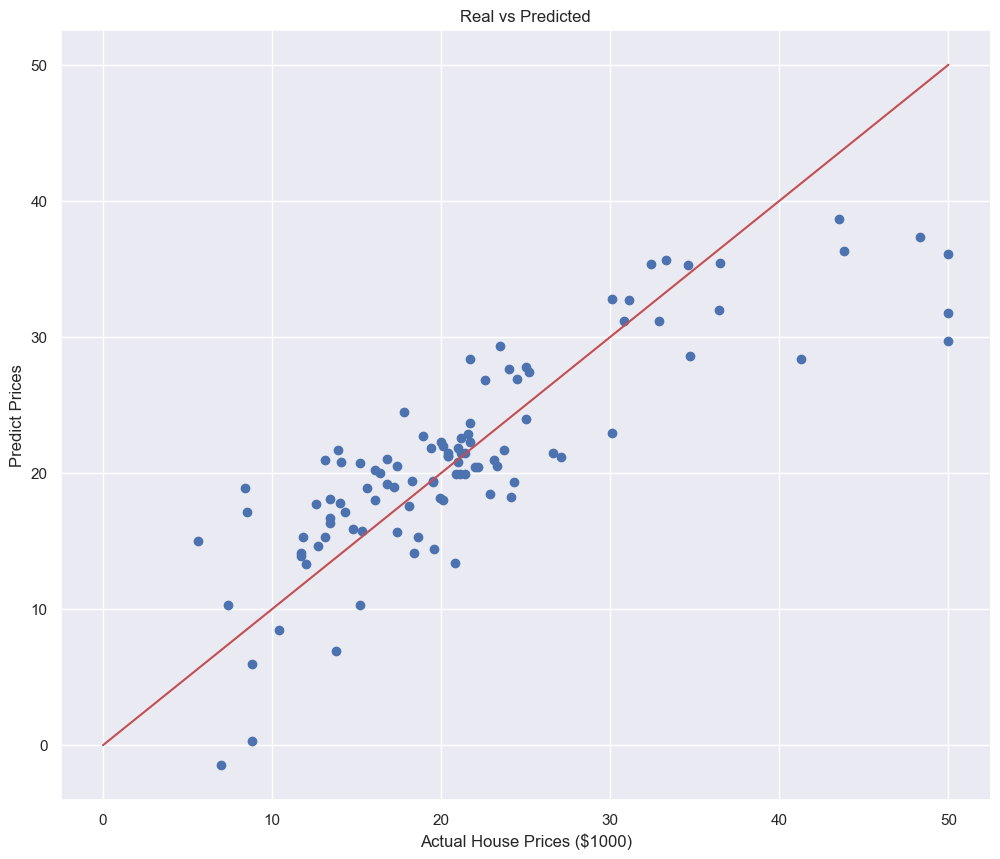

In [36]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predict Prices")
plt.title("Real vs Predicted")
plt.plot([0,50], [0,50], 'r')
plt.show()